<a href="https://colab.research.google.com/github/mwaura-k/Autolib/blob/main/Moringa_School_Karen_Mwaura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autolib_Daily_Events_Postal_codes

The dataset focuses on the autolib daily events postal codes. Autolib is defined as an electric car sharing system. 
Deliverables for the project are:

*   Github repo
*   Hypothesis testing report
 
The main task for this is:

*   Investigate a claim about the blue cars from the given dataset.
*   Identify areas and periods of interest via sampling.

*   State the reason for the choice of method.
*  Perform a hypothesis testing with regards to the claims made.









### Import the necessary libraries 

In [ ]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load dataset

In [ ]:
#  Load dataset
df=pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# shape of the dataset
df.shape

(16085, 13)

In [ ]:
# Find the missing values
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# Getting unique values
df['BlueCars_taken_sum'].nunique()

932

In [ ]:
# Getting unique values
df['BlueCars_returned_sum'].nunique()

929

In [ ]:
#Convert date to datetime
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [ ]:
# Renaming columns
df.rename(columns = {'Postal code':'Postal_code'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal_code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

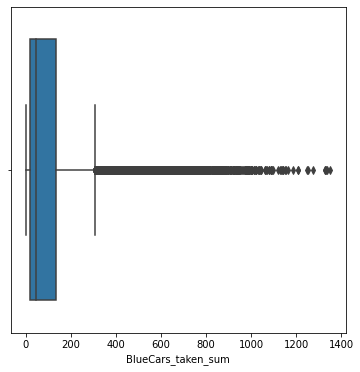

In [ ]:
# Looking for outliers
plt.figure(figsize =(6,6))
sns.boxplot(x= df['BlueCars_taken_sum'])

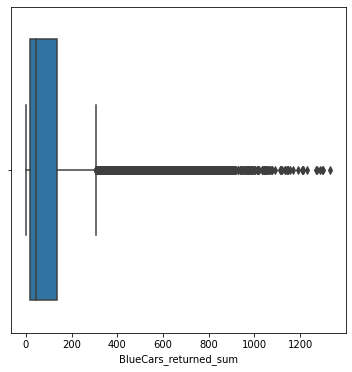

In [ ]:
# Looking for outliers
plt.figure(figsize =(6,6))
sns.boxplot(x= df['BlueCars_returned_sum'])

Identifying how many outliers are in the dataset

In [ ]:
# Getting the IQR
def out_iqr(df , column):
    global lower,upper
    q25, q75 =np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

    #Calculate IQR
    iqr = q75 - q25

    # Getting data below teh first quartile and over third quartile
    cut_off = iqr * 1.5

    #Getting lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('IQR is',iqr)
    print('Lower bound value is', lower)
    print('Upper bound value is', upper)

    # Calculate number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total outliers:', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df,'BlueCars_returned_sum')

IQR is 115.0
Lower bound value is -152.5
Upper bound value is 307.5
Total outliers: 2213


Graphical representation of the outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


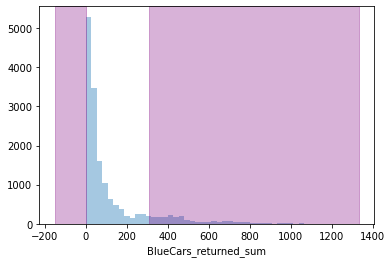

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df.BlueCars_returned_sum, kde=False)
plt.axvspan(xmin = lower,xmax= df.BlueCars_returned_sum.min(),alpha=0.3, color='purple')
plt.axvspan(xmin = upper,xmax= df.BlueCars_returned_sum.max(),alpha=0.3, color='purple')

In [ ]:
# Getting the IQR
def out_iqr(df , column):
    global lower,upper
    q25, q75 =np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

    #Calculate IQR
    iqr = q75 - q25

    # Getting data below teh first quartile and over third quartile
    cut_off = iqr * 1.5

    #Getting lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('IQR is',iqr)
    print('Lower bound value is', lower)
    print('Upper bound value is', upper)

    # Calculate number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total outliers:', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df,'BlueCars_taken_sum')

IQR is 115.0
Lower bound value is -152.5
Upper bound value is 307.5
Total outliers: 2215


### Univariate analysis

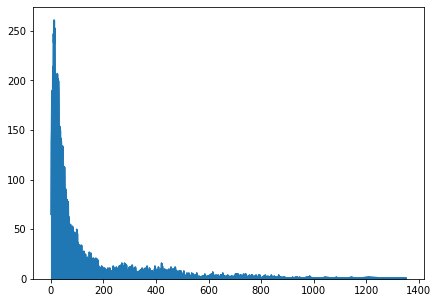

In [ ]:
plt.figure(figsize=(7, 5))
df['BlueCars_taken_sum'].value_counts().sort_index().plot.area()

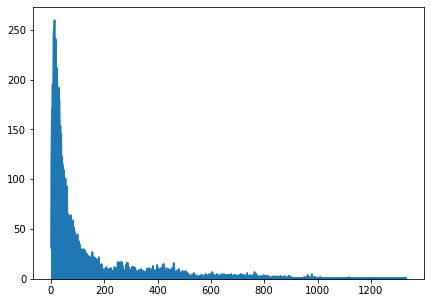

In [ ]:
plt.figure(figsize=(7, 5))
df['BlueCars_returned_sum'].value_counts().sort_index().plot.area()

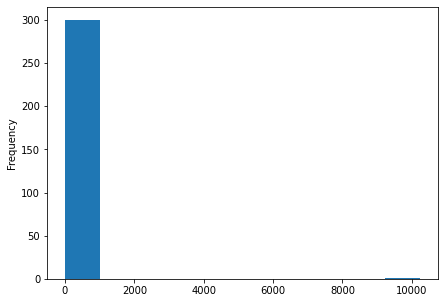

In [ ]:
plt.figure(figsize=(7, 5))
df['Slots_taken_sum'].value_counts().sort_index().plot.hist()

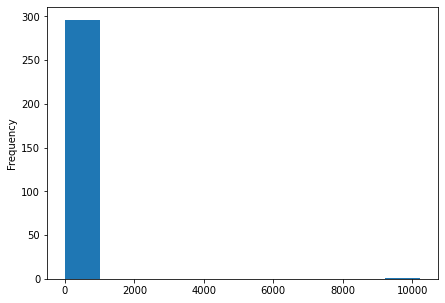

In [ ]:
plt.figure(figsize=(7, 5))
df['Slots_freed_sum'].value_counts().sort_index().plot.hist()

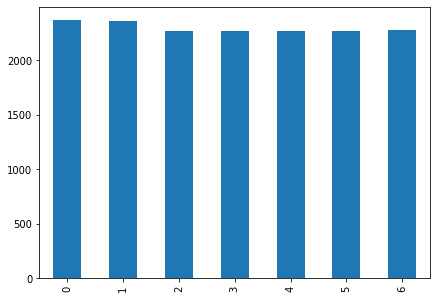

In [ ]:
plt.figure(figsize=(7, 5))
df['dayOfWeek'].value_counts().sort_index().plot.bar()

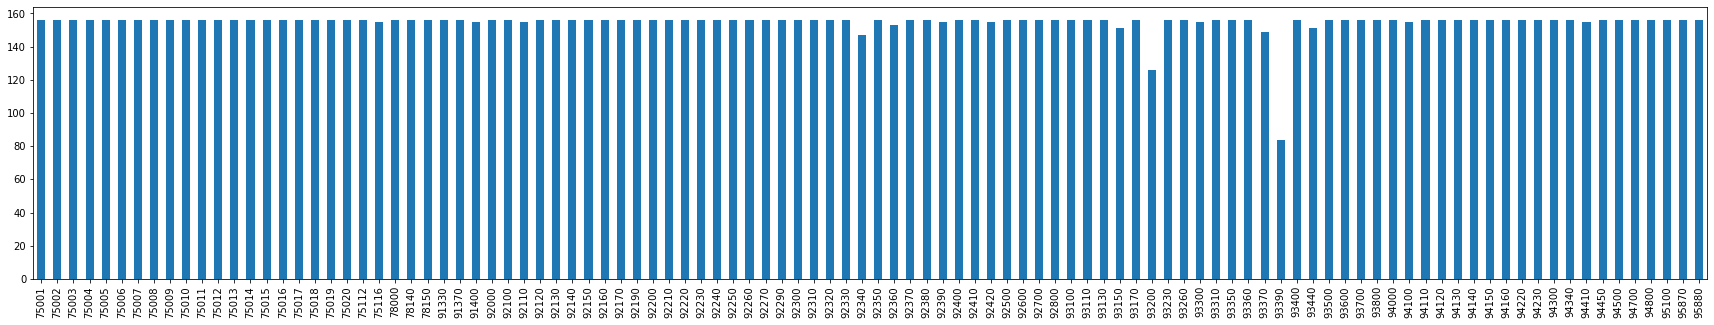

In [ ]:
plt.figure(figsize=(30, 5))
df['Postal_code'].value_counts().sort_index().plot.bar()

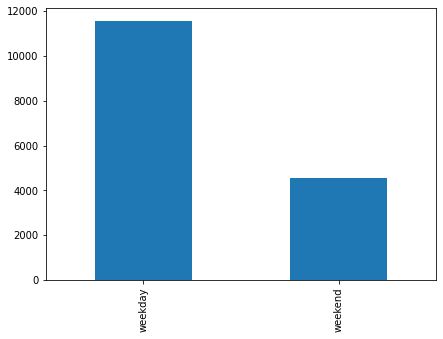

In [ ]:

plt.figure(figsize=(7, 5))
df['day_type'].value_counts().sort_index().plot.bar()

In [ ]:
# Find mean
df["BlueCars_taken_sum"].mean()

125.92695057506994

In [ ]:
# Find mean of BlueCars_returned_sum
df["BlueCars_returned_sum"].mean()

125.912713708424

In [ ]:
# Find std of BlueCars_returned_sum
df["BlueCars_returned_sum"].std()

185.50153480148427

In [ ]:
# Find std of BlueCars_taken_sum
df["BlueCars_taken_sum"].std()

185.42657876727893

In [ ]:
# Find skewness of BlueCars_taken_sum
df["BlueCars_taken_sum"].skew()

2.4063548974959086

### Bivariate analysis

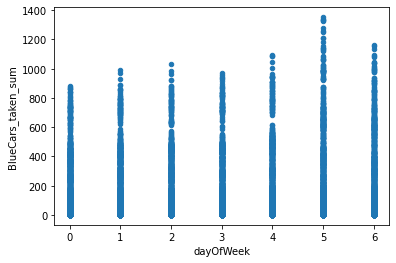

In [ ]:
df.plot(x = 'dayOfWeek', y = 'BlueCars_taken_sum', kind='scatter')

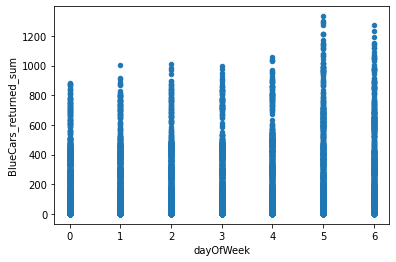

In [ ]:
df.plot(x = 'dayOfWeek', y = 'BlueCars_returned_sum', kind='scatter')

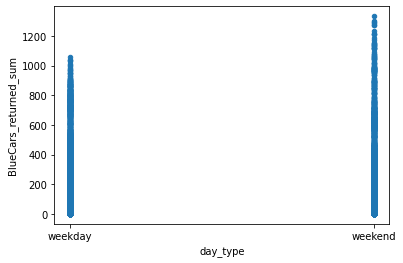

In [ ]:
df.plot(x = 'day_type', y = 'BlueCars_returned_sum', kind='scatter')

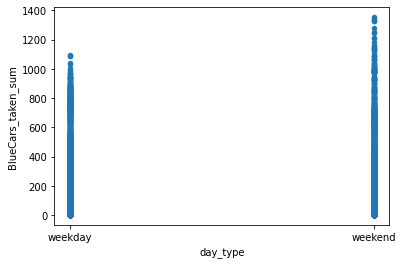

In [ ]:
df.plot(x = 'day_type', y = 'BlueCars_taken_sum', kind='scatter')

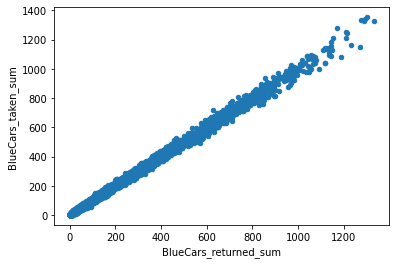

In [ ]:
df.plot(x = 'BlueCars_returned_sum', y = 'BlueCars_taken_sum', kind='scatter')

In [ ]:
#  Calculate pearsons coefficient
df.corr()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


In [ ]:
# Calculate pearsons coefficient

df["BlueCars_returned_sum"].corr(df["BlueCars_taken_sum"])

0.9986597051672199

In [ ]:
# Calculate pearsons coefficient

df["dayOfWeek"].corr(df["BlueCars_taken_sum"])

0.07964926759308416

In [ ]:
df["dayOfWeek"].corr(df["BlueCars_returned_sum"])

0.08195445794154745

In [ ]:
df["Slots_freed_sum"].corr(df["BlueCars_returned_sum"])

0.9482575524525811

### Multivariate

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
day_type_encoded = le.fit_transform(df['day_type'])

print(day_type_encoded)

[0 0 0 ... 1 0 0]


In [ ]:
le = LabelEncoder()
date_encoded = le.fit_transform(df['date'])

print(date_encoded)

[  0   1   2 ... 153 154 155]


In [ ]:
df['day_type'] =day_type_encoded
df

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,0,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,0,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,0,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,0,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,0,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,0,15,10,0,0,2,3,0,0
16081,95880,2018-06-16,1440,5,1,19,19,0,0,2,1,0,0
16082,95880,2018-06-17,1440,6,1,33,35,1,1,0,0,0,0
16083,95880,2018-06-18,1440,0,0,11,14,3,5,2,2,0,0


In [ ]:
# prepare x and y
x=df.drop('BlueCars_taken_sum', 1)
y=df['BlueCars_taken_sum']

In [ ]:
# split dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

### sampling

In [ ]:
import random
# Select sample 
X_sample = df.sample(n = 5, replace="False")
X_sample

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
13464,94120,1/31/2018,1440,2,weekday,32,35,0,0,6,6,0,0
1700,75011,6/4/2018,1440,0,weekday,419,396,18,17,22,20,102,103
12654,93600,6/19/2018,1370,1,weekday,0,2,0,0,1,0,0,0
4483,92000,5/1/2018,1440,1,weekday,135,129,2,2,9,9,0,0
12884,93800,3/18/2018,1440,6,weekend,31,27,3,3,1,0,0,0


In [ ]:
# Find mean
X_sample["BlueCars_taken_sum"].mean()

123.4

Shapiro test

In [ ]:
# imporing the shapiro function
from scipy.stats import shapiro 

In [ ]:
from numpy.random import randn
df = 5 * randn(100) + 50

In [ ]:
# testing for normality
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.988, p=0.545


In [ ]:
# interpreting
alpha = 0.05
if p > alpha:
	print('Sample is Gaussian')
else:
	print('Sample is not Gaussian')

Sample is Gaussian


### Hypothesis

In [ ]:
# Claim: The blue cars are always picked on the weekdays .
#state null/ alternative hypothesis
Hₒ : μ = 0
Hₐ : μ ≠ 0

In [ ]:
# Level of significance
We will use the two tailed test. The level of significance is .025 . 

In [ ]:
# Find critical values using Z-test
100-5
The .95 is considered as confidence level and critical-value is 1.960 on the positive side and -1.960 on the negative side

95

In [ ]:
# Find test statistic

zscore= (123.4 -125.9) /185.4
zscore

-0.013484358144552318

In [ ]:
# import libraries
from scipy.stats import norm
import scipy.stats as stats
prob = stats.norm.cdf(-0.013484358144552318)
prob

0.4946206824309059

In [ ]:
# Conclusion
Since the zscore is (-0.013484358144552318), our P-value (0.4946206824309059)0.49% does not fall 
within that range hence we accept the null hypothesis.